In [4]:
import os
from io import StringIO, BytesIO
import IPython.display
import numpy as np
import PIL.Image
from PIL import Image
from scipy.stats import truncnorm
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import imghdr
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed

Using TensorFlow backend.


In [11]:
dirpath = r"\Users\brian\Documents\dsc160-final-dsc160-group18\data\albums"
thepath = r"\Users\brian\Documents\dsc160-final-dsc160-group18\data\512albums"

In [18]:
def make_thumbnail(filename, imagepath, newpath):
    #print(imagepath + "\\" + filename)
    temp = imagepath + "\\" + filename
    img = Image.open(temp)
    img = img.resize((512, 512))
    img.save(newpath + "\\" + filename)

In [21]:
directory = imagepath = os.fsencode(r"C:\\Users\brian\Documents\dsc160-final-dsc160-group18\data\albums")
for file in os.listdir(directory):
    make_thumbnail(file.decode('utf-8'), dirpath, thepath)

In [187]:
from os import listdir
dirt = r"C:\\Users\brian\Documents\dsc160-final-dsc160-group18\data\512albums"
from numpy import asarray
def load_images(path, size=(512,512)):
    temp = list()
    for filename in listdir(path):
        pixels = load_img(path + "\\" + filename, target_size=size)
        pixels = img_to_array(pixels)
        temp.append(pixels)
    return asarray(temp)

data = load_images(dirt)
filename = 'albums.npz'
savez_compressed(filename, data)

In [208]:
from numpy import load
from matplotlib import pyplot
data = load('albums.npz')
images = data['arr_0']
images.shape

(96, 512, 512, 3)

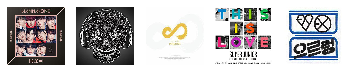

In [212]:
n_samples = 5
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(images[i].astype('uint8'))
pyplot.show()

In [224]:
images

array([[[[ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         ...,
         [167., 142., 138.],
         [231., 200., 198.],
         [231., 200., 198.]],

        [[ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         ...,
         [167., 142., 138.],
         [231., 200., 198.],
         [231., 200., 198.]],

        [[ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         ...,
         [243., 218., 214.],
         [179., 149., 147.],
         [179., 149., 147.]],

        ...,

        [[164., 139., 135.],
         [164., 139., 135.],
         [245., 220., 216.],
         ...,
         [ 23.,  19.,  16.],
         [ 23.,  19.,  16.],
         [ 23.,  19.,  16.]],

        [[232., 201., 199.],
         [232., 201., 199.],
         [179., 149., 147.],
         ...,
         [ 23.,  19.,  16.],
         [ 24.,  20.,  17.],
         [ 24.,  20.,  17.]],

        [[232., 201., 199.],
       

In [22]:
import os
import glob
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from sklearn.utils import shuffle
import time
import cv2
import scipy
import imageio
from PIL import Image
import matplotlib.gridspec as gridspec
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Flatten
from keras.layers import Input
from keras.layers import Conv2D, Conv2DTranspose, Dropout
from keras.models import Model
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers.advanced_activations import LeakyReLU
#from GAN_Nets import get_disc_normal, get_gen_normal
import matplotlib.pyplot as plt
from keras.models import load_model
import keras.backend as K
#from scipy.interpolate import spline
#K.set_image_dim_ordering('tf')


In [23]:
def norm_img(img):
    '''A function to Normalize Images.
    Input:
        img : Original image as numpy array.
    Output: Normailized Image as numpy array
    '''
    img = (img / 127.5) - 1
    return img
def denorm_img(img):
    '''A function to Denormailze, i.e. recreate image from normalized image
    Input:
        img : Normalized image as numpy array.
    Output: Original Image as numpy array
    '''
    img = (img + 1) * 127.5
    return img.astype(np.uint8) 
def sample_from_dataset(batch_size, image_shape, data_dir):
    '''Create a batch of image samples by sampling random images from a data directory.
    Resizes the image using image_shape and normalize the images.
    Input:
        batch_size : Sample size required
        image_size : Size that Image should be resized to
        data_dir : Path of directory where training images are placed.
    Output:
        sample : batch of processed images 
    '''
    sample_dim = (batch_size,) + image_shape
    sample = np.empty(sample_dim, dtype=np.float32)
    all_data_dirlist = list(glob.glob(data_dir + '*/*.jpg'))
    sample_imgs_paths = np.random.choice(all_data_dirlist,batch_size)
    for index,img_filename in enumerate(sample_imgs_paths):
        image = Image.open(img_filename)
        image = image.resize(image_shape[:-1])
        image = image.convert('RGB') 
        image = np.asarray(image)
        image = norm_img(image)
        sample[index,...] = image
    return sample

In [24]:
def generate_images(generator, save_dir):
    noise = gen_noise(batch_size,noise_shape)
    #using noise produced by np.random.uniform - the generator seems to produce same image for ANY noise - 
    #but those images (even though they are the same) are very close to the actual image - experiment with it later.
    fake_data_X = generator.predict(noise)
    print("Displaying generated images")
    plt.figure(figsize=(4,4))
    gs1 = gridspec.GridSpec(4, 4)
    gs1.update(wspace=0, hspace=0)
    rand_indices = np.random.choice(fake_data_X.shape[0],16,replace=False)
    for i in range(16):
        #plt.subplot(4, 4, i+1)
        ax1 = plt.subplot(gs1[i])
        ax1.set_aspect('equal')
        rand_index = rand_indices[i]
        image = fake_data_X[rand_index, :,:,:]
        fig = plt.imshow(denorm_img(image))
        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.savefig(save_dir+str(time.time())+"_GENERATEDimage.png",bbox_inches='tight',pad_inches=0)
    plt.show()

In [25]:
def save_img_batch(img_batch,img_save_dir):
    plt.figure(figsize=(4,4))
    gs1 = gridspec.GridSpec(4, 4)
    gs1.update(wspace=0, hspace=0)
    rand_indices = np.random.choice(img_batch.shape[0],16,replace=False)
    #print(rand_indices)
    for i in range(16):
        #plt.subplot(4, 4, i+1)
        ax1 = plt.subplot(gs1[i])
        ax1.set_aspect('equal')
        rand_index = rand_indices[i]
        image = img_batch[rand_index, :,:,:]
        fig = plt.imshow(denorm_img(image))
        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.savefig(img_save_dir,bbox_inches='tight',pad_inches=0)
    plt.show()   

In [26]:
def gen_noise(batch_size, noise_shape):
    ''' Generates a numpy vector sampled from normal distribution of shape                                (batch_size,noise_shape)
    Input:
        batch_size : size of batch
        noise_shape: shape of noise vector, normally kept as 100 
    Output:a numpy vector sampled from normal distribution of shape                                  (batch_size,noise_shape)     
    '''
    return np.random.normal(0, 1, size=(batch_size,)+noise_shape)

In [27]:
def get_gen_normal(noise_shape):
    ''' This function takes as input shape of the noise vector and creates the Keras generator    architecture.
    '''
    kernel_init = 'glorot_uniform'    
    gen_input = Input(shape = noise_shape) 
    
    # Transpose 2D conv layer 1. 
    generator = Conv2DTranspose(filters = 512, kernel_size = (4,4), strides = (1,1), padding = "valid", data_format = "channels_last", kernel_initializer = kernel_init)(gen_input)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
    # Transpose 2D conv layer 2.
    generator = Conv2DTranspose(filters = 256, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
    # Transpose 2D conv layer 3.
    generator = Conv2DTranspose(filters = 128, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
    # Transpose 2D conv layer 4.
    generator = Conv2DTranspose(filters = 64, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
    # conv 2D layer 1.
    generator = Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    generator = BatchNormalization(momentum = 0.5)(generator)
    generator = LeakyReLU(0.2)(generator)
    
    # Final Transpose 2D conv layer 5 to generate final image. Filter size 3 for 3 image channel
    generator = Conv2DTranspose(filters = 3, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(generator)
    
    # Tanh activation to get final normalized image
    generator = Activation('tanh')(generator)
    
    # defining the optimizer and compiling the generator model.
    gen_opt = Adam(lr=0.00015, beta_1=0.5)
    generator_model = Model(inputs = gen_input, output = generator)
    generator_model.compile(loss='binary_crossentropy', optimizer=gen_opt, metrics=['accuracy'])
    generator_model.summary()
    return generator_model

In [28]:
def get_disc_normal(image_shape=(64,64,3)):
    dropout_prob = 0.4
    kernel_init = 'glorot_uniform'
    dis_input = Input(shape = image_shape)
    
    # Conv layer 1:
    discriminator = Conv2D(filters = 64, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(dis_input)
    discriminator = LeakyReLU(0.2)(discriminator)
    # Conv layer 2:
    discriminator = Conv2D(filters = 128, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(discriminator)
    discriminator = BatchNormalization(momentum = 0.5)(discriminator)
    discriminator = LeakyReLU(0.2)(discriminator)
    # Conv layer 3:   
    discriminator = Conv2D(filters = 256, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(discriminator)
    discriminator = BatchNormalization(momentum = 0.5)(discriminator)
    discriminator = LeakyReLU(0.2)(discriminator)
    # Conv layer 4:
    discriminator = Conv2D(filters = 512, kernel_size = (4,4), strides = (2,2), padding = "same", data_format = "channels_last", kernel_initializer = kernel_init)(discriminator)
    discriminator = BatchNormalization(momentum = 0.5)(discriminator)
    discriminator = LeakyReLU(0.2)(discriminator)#discriminator = MaxPooling2D(pool_size=(2, 2))(discriminator)
    # Flatten
    discriminator = Flatten()(discriminator)
    # Dense Layer
    discriminator = Dense(1)(discriminator)
    # Sigmoid Activation
    discriminator = Activation('sigmoid')(discriminator)
    # Optimizer and Compiling model
    dis_opt = Adam(lr=0.0002, beta_1=0.5)
    discriminator_model = Model(inputs = dis_input, output = discriminator)
    discriminator_model.compile(loss='binary_crossentropy', optimizer=dis_opt, metrics=['accuracy'])
    discriminator_model.summary()
    return discriminator_model

In [29]:
noise_shape = (1,1,100)
num_steps = 10000
batch_size = 32
image_shape = None
img_save_dir = dirt = r"C:\\Users\brian\Documents\dsc160-final-dsc160-group18\data\output"
save_model = True
image_shape = (64, 64, 3)
data_dir = r"C:\\Users\brian\Documents\dsc160-final-dsc160-group18\data\512albums"

log_dir = img_save_dir
save_model_dir = img_save_dir

In [30]:
discriminator = get_disc_normal(image_shape)
generator = get_gen_normal(noise_shape)

C:\Users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        3136      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       131200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         5245

C:\Users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


In [31]:
discriminator.trainable = False

# Optimizer for the GAN
opt = Adam(lr=0.00015, beta_1=0.5) #same as generator
# Input to the generator
gen_inp = Input(shape=noise_shape)

GAN_inp = generator(gen_inp)
GAN_opt = discriminator(GAN_inp)

# Final GAN
gan = Model(input = gen_inp, output = GAN_opt)
gan.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])

#plot_model(gan, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

C:\Users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("mo...)`
  if sys.path[0] == '':


Begin step:  0


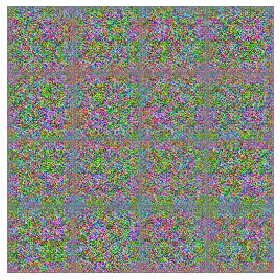

Disc: real loss: 0.516953 fake loss: 0.544650
GAN loss: 3.744548
Step 0 completed. Time took: 2 secs.
Begin step:  1
Disc: real loss: 0.474168 fake loss: 1.000866
GAN loss: 5.672279
Step 1 completed. Time took: 1 secs.
Begin step:  2
Disc: real loss: 0.613047 fake loss: 0.617889
GAN loss: 5.026959
Step 2 completed. Time took: 1 secs.
Begin step:  3
Disc: real loss: 0.790065 fake loss: 0.540590
GAN loss: 3.912527
Step 3 completed. Time took: 1 secs.
Begin step:  4
Disc: real loss: 0.569299 fake loss: 0.398234
GAN loss: 3.110327
Step 4 completed. Time took: 1 secs.
Begin step:  5
Disc: real loss: 0.541010 fake loss: 0.634158
GAN loss: 6.368078
Step 5 completed. Time took: 1 secs.
Begin step:  6
Disc: real loss: 0.580762 fake loss: 0.572045
GAN loss: 5.205312
Step 6 completed. Time took: 1 secs.
Begin step:  7
Disc: real loss: 0.513537 fake loss: 0.666591
GAN loss: 5.978095
Step 7 completed. Time took: 1 secs.
Begin step:  8
Disc: real loss: 0.510896 fake loss: 0.497490
GAN loss: 4.366602

Disc: real loss: 0.390527 fake loss: 0.386106
GAN loss: 2.612832
Step 69 completed. Time took: 1 secs.
Begin step:  70
Disc: real loss: 0.391069 fake loss: 0.394848
GAN loss: 2.326812
Step 70 completed. Time took: 1 secs.
Begin step:  71
Disc: real loss: 0.381798 fake loss: 0.362803
GAN loss: 2.872484
Step 71 completed. Time took: 1 secs.
Begin step:  72
Disc: real loss: 0.354005 fake loss: 0.355098
GAN loss: 2.199188
Step 72 completed. Time took: 1 secs.
Begin step:  73
Disc: real loss: 0.374172 fake loss: 0.530685
GAN loss: 3.438923
Step 73 completed. Time took: 1 secs.
Begin step:  74
Disc: real loss: 0.447718 fake loss: 0.365203
GAN loss: 2.477794
Step 74 completed. Time took: 1 secs.
Begin step:  75
Disc: real loss: 0.354265 fake loss: 0.571456
GAN loss: 3.269602
Step 75 completed. Time took: 1 secs.
Begin step:  76
Disc: real loss: 0.672626 fake loss: 0.385839
GAN loss: 2.098626
Step 76 completed. Time took: 1 secs.
Begin step:  77
Disc: real loss: 0.525113 fake loss: 0.555686
GA

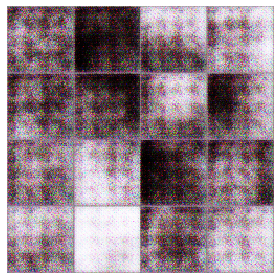

Disc: real loss: 0.401719 fake loss: 0.383980
GAN loss: 3.014393
Step 100 completed. Time took: 2 secs.
Begin step:  101
Disc: real loss: 0.514885 fake loss: 0.356374
GAN loss: 2.720575
Step 101 completed. Time took: 1 secs.
Begin step:  102
Disc: real loss: 0.403468 fake loss: 0.352441
GAN loss: 2.544116
Step 102 completed. Time took: 1 secs.
Begin step:  103
Disc: real loss: 0.381344 fake loss: 0.458456
GAN loss: 3.476935
Step 103 completed. Time took: 1 secs.
Begin step:  104
Disc: real loss: 0.458830 fake loss: 0.354304
GAN loss: 2.205318
Step 104 completed. Time took: 1 secs.
Begin step:  105
Disc: real loss: 0.341307 fake loss: 0.593586
GAN loss: 4.292894
Step 105 completed. Time took: 1 secs.
Begin step:  106
Disc: real loss: 0.903721 fake loss: 0.422534
GAN loss: 2.280670
Step 106 completed. Time took: 1 secs.
Begin step:  107
Disc: real loss: 0.350928 fake loss: 0.426099
GAN loss: 3.320769
Step 107 completed. Time took: 1 secs.
Begin step:  108
Disc: real loss: 0.370870 fake l

Disc: real loss: 0.441969 fake loss: 0.411904
GAN loss: 2.870227
Step 168 completed. Time took: 1 secs.
Begin step:  169
Disc: real loss: 0.450772 fake loss: 0.311825
GAN loss: 2.446267
Step 169 completed. Time took: 1 secs.
Begin step:  170
Disc: real loss: 0.340964 fake loss: 0.385798
GAN loss: 3.111920
Step 170 completed. Time took: 1 secs.
Begin step:  171
Disc: real loss: 0.356281 fake loss: 0.387935
GAN loss: 2.022739
Step 171 completed. Time took: 2 secs.
Begin step:  172
Disc: real loss: 0.412045 fake loss: 0.537334
GAN loss: 3.881985
Step 172 completed. Time took: 1 secs.
Begin step:  173
Disc: real loss: 0.644247 fake loss: 0.377071
GAN loss: 1.994145
Step 173 completed. Time took: 1 secs.
Begin step:  174
Disc: real loss: 0.391338 fake loss: 0.537823
GAN loss: 3.787968
Step 174 completed. Time took: 1 secs.
Begin step:  175
Disc: real loss: 0.322564 fake loss: 0.499912
GAN loss: 3.272281
Step 175 completed. Time took: 1 secs.
Begin step:  176
Disc: real loss: 0.372168 fake l

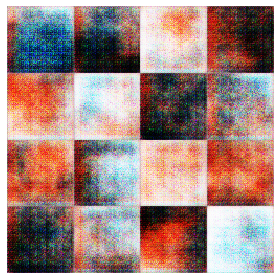

Disc: real loss: 0.461312 fake loss: 0.403439
GAN loss: 2.563465
Step 200 completed. Time took: 2 secs.
Begin step:  201
Disc: real loss: 0.417301 fake loss: 0.539481
GAN loss: 2.933195
Step 201 completed. Time took: 1 secs.
Begin step:  202
Disc: real loss: 0.587560 fake loss: 0.420649
GAN loss: 2.418493
Step 202 completed. Time took: 2 secs.
Begin step:  203
Disc: real loss: 0.336844 fake loss: 0.451605
GAN loss: 2.508593
Step 203 completed. Time took: 1 secs.
Begin step:  204
Disc: real loss: 0.391974 fake loss: 0.366657
GAN loss: 1.796241
Step 204 completed. Time took: 1 secs.
Begin step:  205
Disc: real loss: 0.326422 fake loss: 0.439912
GAN loss: 2.949680
Step 205 completed. Time took: 1 secs.
Begin step:  206
Disc: real loss: 0.748122 fake loss: 0.915182
GAN loss: 4.055188
Step 206 completed. Time took: 1 secs.
Begin step:  207
Disc: real loss: 0.988185 fake loss: 0.383717
GAN loss: 2.518956
Step 207 completed. Time took: 1 secs.
Begin step:  208
Disc: real loss: 0.395024 fake l

Disc: real loss: 0.394262 fake loss: 0.407648
GAN loss: 2.672237
Step 268 completed. Time took: 1 secs.
Begin step:  269
Disc: real loss: 0.621810 fake loss: 0.474800
GAN loss: 2.202533
Step 269 completed. Time took: 1 secs.
Begin step:  270
Disc: real loss: 0.380857 fake loss: 0.402277
GAN loss: 1.968952
Step 270 completed. Time took: 1 secs.
Begin step:  271
Disc: real loss: 0.368361 fake loss: 0.376558
GAN loss: 2.390594
Step 271 completed. Time took: 1 secs.
Begin step:  272
Disc: real loss: 0.510794 fake loss: 0.458619
GAN loss: 2.361788
Step 272 completed. Time took: 1 secs.
Begin step:  273
Disc: real loss: 0.422018 fake loss: 0.359346
GAN loss: 2.811443
Step 273 completed. Time took: 1 secs.
Begin step:  274
Disc: real loss: 0.359525 fake loss: 0.334706
GAN loss: 2.207731
Step 274 completed. Time took: 1 secs.
Begin step:  275
Disc: real loss: 0.439226 fake loss: 0.757657
GAN loss: 3.680578
Step 275 completed. Time took: 1 secs.
Begin step:  276
Disc: real loss: 0.501435 fake l

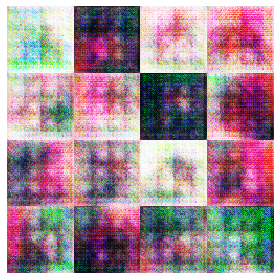

Disc: real loss: 0.370558 fake loss: 0.368687
GAN loss: 2.616460
Step 300 completed. Time took: 2 secs.
Begin step:  301
Disc: real loss: 0.408794 fake loss: 0.311286
GAN loss: 2.087931
Step 301 completed. Time took: 1 secs.
Begin step:  302
Disc: real loss: 0.412370 fake loss: 0.374428
GAN loss: 2.184713
Step 302 completed. Time took: 1 secs.
Begin step:  303
Disc: real loss: 0.389666 fake loss: 0.353967
GAN loss: 2.523591
Step 303 completed. Time took: 1 secs.
Begin step:  304
Disc: real loss: 0.342611 fake loss: 0.379375
GAN loss: 2.063503
Step 304 completed. Time took: 1 secs.
Begin step:  305
Disc: real loss: 0.414417 fake loss: 0.403309
GAN loss: 2.330838
Step 305 completed. Time took: 1 secs.
Begin step:  306
Disc: real loss: 0.323878 fake loss: 0.396881
GAN loss: 2.538697
Step 306 completed. Time took: 1 secs.
Begin step:  307
Disc: real loss: 0.395896 fake loss: 0.559427
GAN loss: 3.628436
Step 307 completed. Time took: 1 secs.
Begin step:  308
Disc: real loss: 0.586712 fake l

Disc: real loss: 0.462496 fake loss: 0.510755
GAN loss: 3.087240
Step 368 completed. Time took: 1 secs.
Begin step:  369
Disc: real loss: 0.455329 fake loss: 0.382719
GAN loss: 2.144663
Step 369 completed. Time took: 1 secs.
Begin step:  370
Disc: real loss: 0.357030 fake loss: 0.382816
GAN loss: 2.251804
Step 370 completed. Time took: 1 secs.
Begin step:  371
Disc: real loss: 0.374337 fake loss: 0.367685
GAN loss: 1.942090
Step 371 completed. Time took: 1 secs.
Begin step:  372
Disc: real loss: 0.358081 fake loss: 0.551858
GAN loss: 3.725836
Step 372 completed. Time took: 1 secs.
Begin step:  373
Disc: real loss: 0.370725 fake loss: 0.427041
GAN loss: 2.827960
Step 373 completed. Time took: 2 secs.
Begin step:  374
Disc: real loss: 0.343005 fake loss: 0.407740
GAN loss: 2.247936
Step 374 completed. Time took: 1 secs.
Begin step:  375
Disc: real loss: 0.413499 fake loss: 0.370959
GAN loss: 3.480429
Step 375 completed. Time took: 2 secs.
Begin step:  376
Disc: real loss: 0.414373 fake l

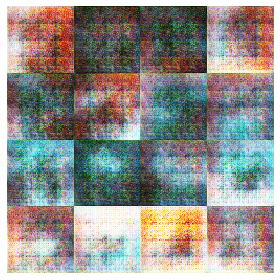

Disc: real loss: 0.440865 fake loss: 0.607867
GAN loss: 3.333637
Step 400 completed. Time took: 2 secs.
Begin step:  401
Disc: real loss: 0.553075 fake loss: 0.348470
GAN loss: 2.507733
Step 401 completed. Time took: 1 secs.
Begin step:  402
Disc: real loss: 0.337603 fake loss: 0.399931
GAN loss: 2.735892
Step 402 completed. Time took: 1 secs.
Begin step:  403
Disc: real loss: 0.347355 fake loss: 0.351060
GAN loss: 2.404097
Step 403 completed. Time took: 2 secs.
Begin step:  404
Disc: real loss: 0.389270 fake loss: 0.398457
GAN loss: 2.278960
Step 404 completed. Time took: 2 secs.
Begin step:  405
Disc: real loss: 0.411357 fake loss: 0.364911
GAN loss: 2.454160
Step 405 completed. Time took: 2 secs.
Begin step:  406
Disc: real loss: 0.426954 fake loss: 0.370680
GAN loss: 1.780249
Step 406 completed. Time took: 1 secs.
Begin step:  407
Disc: real loss: 0.395507 fake loss: 0.400120
GAN loss: 2.242584
Step 407 completed. Time took: 2 secs.
Begin step:  408
Disc: real loss: 0.352666 fake l

Disc: real loss: 0.353153 fake loss: 0.422883
GAN loss: 2.427937
Step 468 completed. Time took: 1 secs.
Begin step:  469
Disc: real loss: 0.355182 fake loss: 0.352207
GAN loss: 1.240321
Step 469 completed. Time took: 1 secs.
Begin step:  470
Disc: real loss: 0.312047 fake loss: 0.619170
GAN loss: 4.479675
Step 470 completed. Time took: 1 secs.
Begin step:  471
Disc: real loss: 0.599942 fake loss: 0.401495
GAN loss: 3.119144
Step 471 completed. Time took: 1 secs.
Begin step:  472
Disc: real loss: 0.318806 fake loss: 0.397879
GAN loss: 3.065116
Step 472 completed. Time took: 1 secs.
Begin step:  473
Disc: real loss: 0.371890 fake loss: 0.385020
GAN loss: 2.444684
Step 473 completed. Time took: 1 secs.
Begin step:  474
Disc: real loss: 0.423820 fake loss: 0.407533
GAN loss: 2.404657
Step 474 completed. Time took: 1 secs.
Begin step:  475
Disc: real loss: 0.328800 fake loss: 0.332553
GAN loss: 2.291169
Step 475 completed. Time took: 2 secs.
Begin step:  476
Disc: real loss: 0.327397 fake l

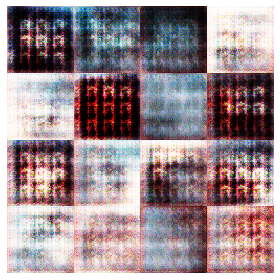

Begin step:  500


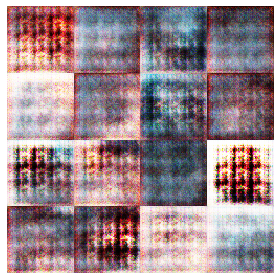

Disc: real loss: 0.342678 fake loss: 0.342140
GAN loss: 2.344162
Step 500 completed. Time took: 2 secs.
Begin step:  501
Disc: real loss: 0.347872 fake loss: 0.393686
GAN loss: 2.250829
Step 501 completed. Time took: 2 secs.
Begin step:  502
Disc: real loss: 0.401924 fake loss: 0.465154
GAN loss: 2.932971
Step 502 completed. Time took: 2 secs.
Begin step:  503
Disc: real loss: 0.419843 fake loss: 0.371414
GAN loss: 2.975272
Step 503 completed. Time took: 1 secs.
Begin step:  504
Disc: real loss: 0.456121 fake loss: 0.421550
GAN loss: 2.159582
Step 504 completed. Time took: 2 secs.
Begin step:  505
Disc: real loss: 0.365704 fake loss: 0.352686
GAN loss: 2.348122
Step 505 completed. Time took: 1 secs.
Begin step:  506
Disc: real loss: 0.372004 fake loss: 0.386628
GAN loss: 3.006964
Step 506 completed. Time took: 1 secs.
Begin step:  507
Disc: real loss: 0.370402 fake loss: 0.338013
GAN loss: 2.596538
Step 507 completed. Time took: 1 secs.
Begin step:  508
Disc: real loss: 0.470280 fake l

Disc: real loss: 0.323809 fake loss: 0.319857
GAN loss: 2.359265
Step 568 completed. Time took: 1 secs.
Begin step:  569
Disc: real loss: 0.381549 fake loss: 0.365904
GAN loss: 2.449265
Step 569 completed. Time took: 1 secs.
Begin step:  570
Disc: real loss: 0.441838 fake loss: 0.480856
GAN loss: 3.005416
Step 570 completed. Time took: 1 secs.
Begin step:  571
Disc: real loss: 0.368954 fake loss: 0.400842
GAN loss: 2.903636
Step 571 completed. Time took: 1 secs.
Begin step:  572
Disc: real loss: 0.362757 fake loss: 0.341261
GAN loss: 1.934333
Step 572 completed. Time took: 1 secs.
Begin step:  573
Disc: real loss: 0.389466 fake loss: 0.475379
GAN loss: 2.655639
Step 573 completed. Time took: 1 secs.
Begin step:  574
Disc: real loss: 0.383193 fake loss: 0.389647
GAN loss: 2.110332
Step 574 completed. Time took: 1 secs.
Begin step:  575
Disc: real loss: 0.471211 fake loss: 0.757987
GAN loss: 4.320230
Step 575 completed. Time took: 2 secs.
Begin step:  576
Disc: real loss: 0.509385 fake l

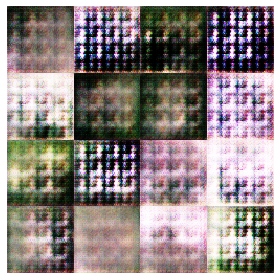

Disc: real loss: 0.351797 fake loss: 0.410663
GAN loss: 2.774201
Step 600 completed. Time took: 2 secs.
Begin step:  601
Disc: real loss: 0.372806 fake loss: 0.342378
GAN loss: 2.118521
Step 601 completed. Time took: 1 secs.
Begin step:  602
Disc: real loss: 0.398249 fake loss: 0.453500
GAN loss: 3.899773
Step 602 completed. Time took: 1 secs.
Begin step:  603
Disc: real loss: 0.674823 fake loss: 0.296874
GAN loss: 1.289205
Step 603 completed. Time took: 1 secs.
Begin step:  604
Disc: real loss: 0.451659 fake loss: 0.514714
GAN loss: 4.065117
Step 604 completed. Time took: 1 secs.
Begin step:  605
Disc: real loss: 0.407496 fake loss: 0.415810
GAN loss: 3.304520
Step 605 completed. Time took: 2 secs.
Begin step:  606
Disc: real loss: 0.370457 fake loss: 0.439081
GAN loss: 2.557185
Step 606 completed. Time took: 1 secs.
Begin step:  607
Disc: real loss: 0.412319 fake loss: 0.408361
GAN loss: 2.344009
Step 607 completed. Time took: 2 secs.
Begin step:  608
Disc: real loss: 0.547894 fake l

Disc: real loss: 0.465228 fake loss: 0.642514
GAN loss: 3.269992
Step 668 completed. Time took: 1 secs.
Begin step:  669
Disc: real loss: 0.407680 fake loss: 0.406108
GAN loss: 3.583042
Step 669 completed. Time took: 1 secs.
Begin step:  670
Disc: real loss: 0.519254 fake loss: 0.338104
GAN loss: 2.310644
Step 670 completed. Time took: 1 secs.
Begin step:  671
Disc: real loss: 0.342950 fake loss: 0.413246
GAN loss: 1.892626
Step 671 completed. Time took: 2 secs.
Begin step:  672
Disc: real loss: 0.397829 fake loss: 0.393567
GAN loss: 2.131612
Step 672 completed. Time took: 1 secs.
Begin step:  673
Disc: real loss: 0.393046 fake loss: 0.437844
GAN loss: 2.338448
Step 673 completed. Time took: 1 secs.
Begin step:  674
Disc: real loss: 0.406163 fake loss: 0.351700
GAN loss: 1.831836
Step 674 completed. Time took: 1 secs.
Begin step:  675
Disc: real loss: 0.366944 fake loss: 0.491506
GAN loss: 3.044692
Step 675 completed. Time took: 1 secs.
Begin step:  676
Disc: real loss: 0.387632 fake l

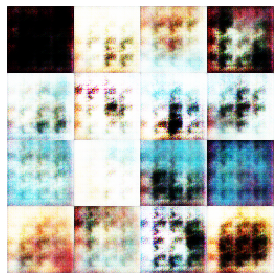

Disc: real loss: 0.553219 fake loss: 0.396821
GAN loss: 2.109163
Step 700 completed. Time took: 2 secs.
Begin step:  701
Disc: real loss: 0.365652 fake loss: 0.432046
GAN loss: 1.895859
Step 701 completed. Time took: 1 secs.
Begin step:  702
Disc: real loss: 0.351415 fake loss: 0.361870
GAN loss: 2.713464
Step 702 completed. Time took: 1 secs.
Begin step:  703
Disc: real loss: 0.423188 fake loss: 0.329046
GAN loss: 1.675593
Step 703 completed. Time took: 2 secs.
Begin step:  704
Disc: real loss: 0.412941 fake loss: 0.477478
GAN loss: 2.636706
Step 704 completed. Time took: 2 secs.
Begin step:  705
Disc: real loss: 0.393788 fake loss: 0.356270
GAN loss: 2.843638
Step 705 completed. Time took: 1 secs.
Begin step:  706
Disc: real loss: 0.448982 fake loss: 0.414637
GAN loss: 2.131171
Step 706 completed. Time took: 2 secs.
Begin step:  707
Disc: real loss: 0.383110 fake loss: 0.368621
GAN loss: 2.345565
Step 707 completed. Time took: 1 secs.
Begin step:  708
Disc: real loss: 0.342334 fake l

Disc: real loss: 0.430699 fake loss: 0.459816
GAN loss: 2.975631
Step 768 completed. Time took: 1 secs.
Begin step:  769
Disc: real loss: 0.487818 fake loss: 0.342555
GAN loss: 1.908987
Step 769 completed. Time took: 2 secs.
Begin step:  770
Disc: real loss: 0.361344 fake loss: 0.522591
GAN loss: 2.885008
Step 770 completed. Time took: 1 secs.
Begin step:  771
Disc: real loss: 0.407441 fake loss: 0.497732
GAN loss: 2.753487
Step 771 completed. Time took: 1 secs.
Begin step:  772
Disc: real loss: 0.517900 fake loss: 0.529450
GAN loss: 1.652296
Step 772 completed. Time took: 1 secs.
Begin step:  773
Disc: real loss: 0.502070 fake loss: 0.371603
GAN loss: 2.149259
Step 773 completed. Time took: 1 secs.
Begin step:  774
Disc: real loss: 0.447845 fake loss: 0.406392
GAN loss: 2.505453
Step 774 completed. Time took: 1 secs.
Begin step:  775
Disc: real loss: 0.526628 fake loss: 0.408893
GAN loss: 2.638228
Step 775 completed. Time took: 2 secs.
Begin step:  776
Disc: real loss: 0.411672 fake l

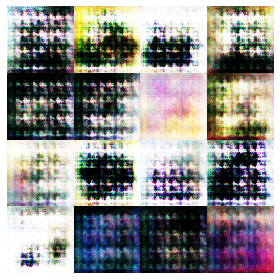

Disc: real loss: 0.426923 fake loss: 0.377238
GAN loss: 1.968356
Step 800 completed. Time took: 2 secs.
Begin step:  801
Disc: real loss: 0.437984 fake loss: 0.679652
GAN loss: 3.948480
Step 801 completed. Time took: 1 secs.
Begin step:  802
Disc: real loss: 0.657240 fake loss: 0.427974
GAN loss: 2.450994
Step 802 completed. Time took: 1 secs.
Begin step:  803
Disc: real loss: 0.331197 fake loss: 0.384649
GAN loss: 2.621247
Step 803 completed. Time took: 1 secs.
Begin step:  804
Disc: real loss: 0.488994 fake loss: 0.458393
GAN loss: 3.420032
Step 804 completed. Time took: 1 secs.
Begin step:  805
Disc: real loss: 0.425957 fake loss: 0.415968
GAN loss: 1.833351
Step 805 completed. Time took: 2 secs.
Begin step:  806
Disc: real loss: 0.386244 fake loss: 0.595533
GAN loss: 4.147276
Step 806 completed. Time took: 2 secs.
Begin step:  807
Disc: real loss: 0.610856 fake loss: 0.417932
GAN loss: 2.118301
Step 807 completed. Time took: 1 secs.
Begin step:  808
Disc: real loss: 0.354980 fake l

Disc: real loss: 0.392345 fake loss: 0.677155
GAN loss: 4.067094
Step 868 completed. Time took: 1 secs.
Begin step:  869
Disc: real loss: 0.401261 fake loss: 0.429164
GAN loss: 2.045888
Step 869 completed. Time took: 1 secs.
Begin step:  870
Disc: real loss: 0.364876 fake loss: 0.735980
GAN loss: 3.419872
Step 870 completed. Time took: 1 secs.
Begin step:  871
Disc: real loss: 0.608765 fake loss: 0.414195
GAN loss: 2.450830
Step 871 completed. Time took: 2 secs.
Begin step:  872
Disc: real loss: 0.568065 fake loss: 0.398098
GAN loss: 1.863087
Step 872 completed. Time took: 1 secs.
Begin step:  873
Disc: real loss: 0.397354 fake loss: 0.426508
GAN loss: 2.267232
Step 873 completed. Time took: 1 secs.
Begin step:  874
Disc: real loss: 0.380965 fake loss: 0.480726
GAN loss: 2.732503
Step 874 completed. Time took: 1 secs.
Begin step:  875
Disc: real loss: 0.370132 fake loss: 0.325988
GAN loss: 1.814424
Step 875 completed. Time took: 1 secs.
Begin step:  876
Disc: real loss: 0.378976 fake l

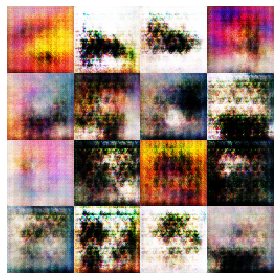

Disc: real loss: 0.447831 fake loss: 0.394802
GAN loss: 2.753895
Step 900 completed. Time took: 2 secs.
Begin step:  901
Disc: real loss: 0.394677 fake loss: 0.405960
GAN loss: 2.612910
Step 901 completed. Time took: 2 secs.
Begin step:  902
Disc: real loss: 0.395894 fake loss: 0.363445
GAN loss: 2.061440
Step 902 completed. Time took: 1 secs.
Begin step:  903
Disc: real loss: 0.451539 fake loss: 0.517603
GAN loss: 3.446600
Step 903 completed. Time took: 2 secs.
Begin step:  904
Disc: real loss: 0.573897 fake loss: 0.365955
GAN loss: 2.064272
Step 904 completed. Time took: 1 secs.
Begin step:  905
Disc: real loss: 0.374152 fake loss: 0.399198
GAN loss: 2.868544
Step 905 completed. Time took: 2 secs.
Begin step:  906
Disc: real loss: 0.438797 fake loss: 0.320406
GAN loss: 2.599201
Step 906 completed. Time took: 2 secs.
Begin step:  907
Disc: real loss: 0.381103 fake loss: 0.363642
GAN loss: 2.633882
Step 907 completed. Time took: 2 secs.
Begin step:  908
Disc: real loss: 0.408701 fake l

Disc: real loss: 0.464579 fake loss: 0.355397
GAN loss: 2.362830
Step 968 completed. Time took: 2 secs.
Begin step:  969
Disc: real loss: 0.373165 fake loss: 0.438159
GAN loss: 2.540693
Step 969 completed. Time took: 1 secs.
Begin step:  970
Disc: real loss: 0.505174 fake loss: 0.374979
GAN loss: 2.290681
Step 970 completed. Time took: 1 secs.
Begin step:  971
Disc: real loss: 0.427490 fake loss: 0.417337
GAN loss: 2.523159
Step 971 completed. Time took: 2 secs.
Begin step:  972
Disc: real loss: 0.527321 fake loss: 0.381217
GAN loss: 1.992306
Step 972 completed. Time took: 2 secs.
Begin step:  973
Disc: real loss: 0.380078 fake loss: 0.399174
GAN loss: 2.412952
Step 973 completed. Time took: 2 secs.
Begin step:  974
Disc: real loss: 0.390390 fake loss: 0.403353
GAN loss: 2.441540
Step 974 completed. Time took: 2 secs.
Begin step:  975
Disc: real loss: 0.450768 fake loss: 0.399892
GAN loss: 2.115159
Step 975 completed. Time took: 1 secs.
Begin step:  976
Disc: real loss: 0.418544 fake l

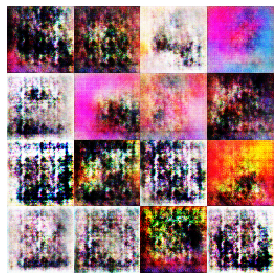

Begin step:  1000


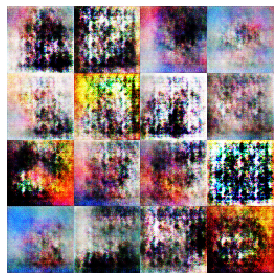

Disc: real loss: 0.424472 fake loss: 0.401560
GAN loss: 3.840709
Step 1000 completed. Time took: 2 secs.
Begin step:  1001
Disc: real loss: 0.376368 fake loss: 0.415548
GAN loss: 2.385145
Step 1001 completed. Time took: 2 secs.
Begin step:  1002
Disc: real loss: 0.380925 fake loss: 0.511788
GAN loss: 4.182608
Step 1002 completed. Time took: 1 secs.
Begin step:  1003
Disc: real loss: 0.682416 fake loss: 0.441123
GAN loss: 2.405071
Step 1003 completed. Time took: 1 secs.
Begin step:  1004
Disc: real loss: 0.428683 fake loss: 0.457272
GAN loss: 2.766100
Step 1004 completed. Time took: 2 secs.
Begin step:  1005
Disc: real loss: 0.351172 fake loss: 0.489216
GAN loss: 2.509257
Step 1005 completed. Time took: 1 secs.
Begin step:  1006
Disc: real loss: 0.388154 fake loss: 0.416484
GAN loss: 2.158861
Step 1006 completed. Time took: 2 secs.
Begin step:  1007
Disc: real loss: 0.401545 fake loss: 0.430761
GAN loss: 2.898098
Step 1007 completed. Time took: 2 secs.
Begin step:  1008
Disc: real loss:

Disc: real loss: 0.474904 fake loss: 0.345649
GAN loss: 2.399717
Step 1067 completed. Time took: 2 secs.
Begin step:  1068
Disc: real loss: 0.509265 fake loss: 0.464260
GAN loss: 2.614928
Step 1068 completed. Time took: 2 secs.
Begin step:  1069
Disc: real loss: 0.407088 fake loss: 0.389202
GAN loss: 2.331204
Step 1069 completed. Time took: 2 secs.
Begin step:  1070
Disc: real loss: 0.346402 fake loss: 0.501983
GAN loss: 2.875117
Step 1070 completed. Time took: 1 secs.
Begin step:  1071
Disc: real loss: 0.373002 fake loss: 0.309729
GAN loss: 2.525023
Step 1071 completed. Time took: 2 secs.
Begin step:  1072
Disc: real loss: 0.798716 fake loss: 0.810297
GAN loss: 2.951924
Step 1072 completed. Time took: 1 secs.
Begin step:  1073
Disc: real loss: 0.404386 fake loss: 0.341005
GAN loss: 3.192136
Step 1073 completed. Time took: 2 secs.
Begin step:  1074
Disc: real loss: 0.489541 fake loss: 0.441343
GAN loss: 1.857776
Step 1074 completed. Time took: 2 secs.
Begin step:  1075
Disc: real loss:

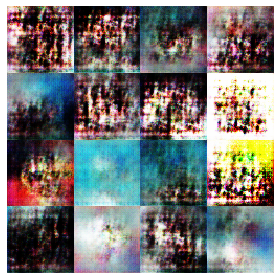

Disc: real loss: 0.346307 fake loss: 0.408629
GAN loss: 3.473533
Step 1100 completed. Time took: 2 secs.
Begin step:  1101
Disc: real loss: 0.475374 fake loss: 0.377052
GAN loss: 2.394766
Step 1101 completed. Time took: 2 secs.
Begin step:  1102
Disc: real loss: 0.334477 fake loss: 0.363770
GAN loss: 2.124449
Step 1102 completed. Time took: 2 secs.
Begin step:  1103
Disc: real loss: 0.364234 fake loss: 0.319770
GAN loss: 2.224854
Step 1103 completed. Time took: 2 secs.
Begin step:  1104
Disc: real loss: 0.352592 fake loss: 0.333140
GAN loss: 2.590781
Step 1104 completed. Time took: 2 secs.
Begin step:  1105
Disc: real loss: 0.446950 fake loss: 0.349449
GAN loss: 2.044429
Step 1105 completed. Time took: 2 secs.
Begin step:  1106
Disc: real loss: 0.419269 fake loss: 0.746737
GAN loss: 3.247737
Step 1106 completed. Time took: 2 secs.
Begin step:  1107
Disc: real loss: 0.412174 fake loss: 0.420856
GAN loss: 3.478208
Step 1107 completed. Time took: 2 secs.
Begin step:  1108
Disc: real loss:

Disc: real loss: 0.465659 fake loss: 0.494138
GAN loss: 2.294532
Step 1167 completed. Time took: 2 secs.
Begin step:  1168
Disc: real loss: 0.443579 fake loss: 0.429978
GAN loss: 2.695394
Step 1168 completed. Time took: 2 secs.
Begin step:  1169
Disc: real loss: 0.427113 fake loss: 0.380225
GAN loss: 2.779426
Step 1169 completed. Time took: 2 secs.
Begin step:  1170
Disc: real loss: 0.385044 fake loss: 0.394364
GAN loss: 2.069520
Step 1170 completed. Time took: 2 secs.
Begin step:  1171
Disc: real loss: 0.370125 fake loss: 0.420084
GAN loss: 2.360875
Step 1171 completed. Time took: 2 secs.
Begin step:  1172
Disc: real loss: 0.412883 fake loss: 0.396095
GAN loss: 2.705157
Step 1172 completed. Time took: 2 secs.
Begin step:  1173
Disc: real loss: 0.400209 fake loss: 0.374869
GAN loss: 1.765389
Step 1173 completed. Time took: 2 secs.
Begin step:  1174
Disc: real loss: 0.390499 fake loss: 0.393095
GAN loss: 2.419602
Step 1174 completed. Time took: 2 secs.
Begin step:  1175
Disc: real loss:

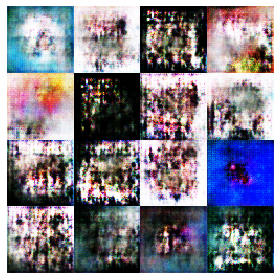

Disc: real loss: 0.356034 fake loss: 0.407005
GAN loss: 2.394229
Step 1200 completed. Time took: 4 secs.
Begin step:  1201
Disc: real loss: 0.389227 fake loss: 0.360209
GAN loss: 2.155758
Step 1201 completed. Time took: 2 secs.
Begin step:  1202
Disc: real loss: 0.374079 fake loss: 0.517137
GAN loss: 3.058581
Step 1202 completed. Time took: 3 secs.
Begin step:  1203
Disc: real loss: 0.432658 fake loss: 0.308894
GAN loss: 2.501327
Step 1203 completed. Time took: 2 secs.
Begin step:  1204
Disc: real loss: 0.456299 fake loss: 0.419940
GAN loss: 2.630003
Step 1204 completed. Time took: 3 secs.
Begin step:  1205
Disc: real loss: 0.357210 fake loss: 0.355324
GAN loss: 2.413309
Step 1205 completed. Time took: 2 secs.
Begin step:  1206
Disc: real loss: 0.485346 fake loss: 0.496975
GAN loss: 2.826644
Step 1206 completed. Time took: 2 secs.
Begin step:  1207
Disc: real loss: 0.445195 fake loss: 0.388621
GAN loss: 2.758210
Step 1207 completed. Time took: 2 secs.
Begin step:  1208
Disc: real loss:

Disc: real loss: 0.355958 fake loss: 0.437604
GAN loss: 2.636683
Step 1267 completed. Time took: 3 secs.
Begin step:  1268
Disc: real loss: 0.428633 fake loss: 0.367170
GAN loss: 2.504837
Step 1268 completed. Time took: 2 secs.
Begin step:  1269
Disc: real loss: 0.354051 fake loss: 0.398771
GAN loss: 2.124333
Step 1269 completed. Time took: 2 secs.
Begin step:  1270
Disc: real loss: 0.394934 fake loss: 0.512476
GAN loss: 2.606953
Step 1270 completed. Time took: 2 secs.
Begin step:  1271
Disc: real loss: 0.462307 fake loss: 0.368501
GAN loss: 2.288483
Step 1271 completed. Time took: 2 secs.
Begin step:  1272
Disc: real loss: 0.392296 fake loss: 0.358140
GAN loss: 2.333202
Step 1272 completed. Time took: 2 secs.
Begin step:  1273
Disc: real loss: 0.419570 fake loss: 0.525852
GAN loss: 2.964677
Step 1273 completed. Time took: 2 secs.
Begin step:  1274
Disc: real loss: 0.403475 fake loss: 0.360574
GAN loss: 2.908246
Step 1274 completed. Time took: 2 secs.
Begin step:  1275
Disc: real loss:

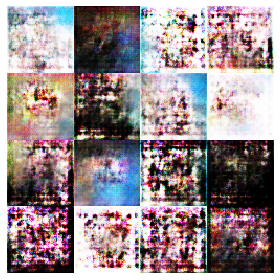

Disc: real loss: 0.450973 fake loss: 0.392573
GAN loss: 1.983800
Step 1300 completed. Time took: 3 secs.
Begin step:  1301
Disc: real loss: 0.315691 fake loss: 0.480181
GAN loss: 2.673843
Step 1301 completed. Time took: 2 secs.
Begin step:  1302
Disc: real loss: 0.351913 fake loss: 0.376190
GAN loss: 2.384129
Step 1302 completed. Time took: 2 secs.
Begin step:  1303
Disc: real loss: 0.392441 fake loss: 0.380691
GAN loss: 2.101871
Step 1303 completed. Time took: 2 secs.
Begin step:  1304
Disc: real loss: 0.335646 fake loss: 0.474413
GAN loss: 3.296607
Step 1304 completed. Time took: 2 secs.
Begin step:  1305
Disc: real loss: 0.506933 fake loss: 0.439649
GAN loss: 2.415317
Step 1305 completed. Time took: 2 secs.
Begin step:  1306
Disc: real loss: 0.390336 fake loss: 0.446370
GAN loss: 2.365884
Step 1306 completed. Time took: 2 secs.
Begin step:  1307
Disc: real loss: 0.380405 fake loss: 0.346040
GAN loss: 2.638363
Step 1307 completed. Time took: 2 secs.
Begin step:  1308
Disc: real loss:

Disc: real loss: 0.449071 fake loss: 0.303759
GAN loss: 1.965697
Step 1367 completed. Time took: 2 secs.
Begin step:  1368
Disc: real loss: 0.363679 fake loss: 0.413449
GAN loss: 2.562426
Step 1368 completed. Time took: 2 secs.
Begin step:  1369
Disc: real loss: 0.373194 fake loss: 0.329560
GAN loss: 2.561788
Step 1369 completed. Time took: 2 secs.
Begin step:  1370
Disc: real loss: 0.417055 fake loss: 0.295874
GAN loss: 2.225047
Step 1370 completed. Time took: 2 secs.
Begin step:  1371
Disc: real loss: 0.390727 fake loss: 0.394678
GAN loss: 2.261909
Step 1371 completed. Time took: 2 secs.
Begin step:  1372
Disc: real loss: 0.410699 fake loss: 0.378353
GAN loss: 1.660113
Step 1372 completed. Time took: 2 secs.
Begin step:  1373
Disc: real loss: 0.351764 fake loss: 0.437084
GAN loss: 2.721687
Step 1373 completed. Time took: 2 secs.
Begin step:  1374
Disc: real loss: 0.394835 fake loss: 0.400838
GAN loss: 2.470810
Step 1374 completed. Time took: 3 secs.
Begin step:  1375
Disc: real loss:

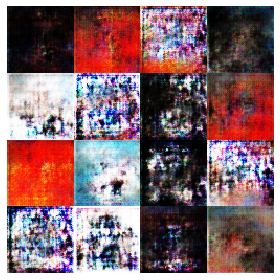

Disc: real loss: 0.857870 fake loss: 0.634755
GAN loss: 3.947527
Step 1400 completed. Time took: 3 secs.
Begin step:  1401
Disc: real loss: 0.423482 fake loss: 0.459172
GAN loss: 2.903918
Step 1401 completed. Time took: 2 secs.
Begin step:  1402
Disc: real loss: 0.488844 fake loss: 0.295306
GAN loss: 1.922428
Step 1402 completed. Time took: 2 secs.
Begin step:  1403
Disc: real loss: 0.417387 fake loss: 0.581237
GAN loss: 3.406039
Step 1403 completed. Time took: 2 secs.
Begin step:  1404
Disc: real loss: 0.485462 fake loss: 0.341955
GAN loss: 2.507323
Step 1404 completed. Time took: 2 secs.
Begin step:  1405
Disc: real loss: 0.357006 fake loss: 0.418924
GAN loss: 1.612910
Step 1405 completed. Time took: 2 secs.
Begin step:  1406
Disc: real loss: 0.435032 fake loss: 0.461246
GAN loss: 1.426092
Step 1406 completed. Time took: 2 secs.
Begin step:  1407
Disc: real loss: 0.403931 fake loss: 0.332092
GAN loss: 2.836504
Step 1407 completed. Time took: 2 secs.
Begin step:  1408
Disc: real loss:

Disc: real loss: 0.465692 fake loss: 0.406176
GAN loss: 2.913602
Step 1467 completed. Time took: 1 secs.
Begin step:  1468
Disc: real loss: 0.433451 fake loss: 0.408315
GAN loss: 2.713294
Step 1468 completed. Time took: 1 secs.
Begin step:  1469
Disc: real loss: 0.379429 fake loss: 0.366564
GAN loss: 2.478901
Step 1469 completed. Time took: 1 secs.
Begin step:  1470
Disc: real loss: 0.382425 fake loss: 0.425706
GAN loss: 2.306277
Step 1470 completed. Time took: 1 secs.
Begin step:  1471
Disc: real loss: 0.337900 fake loss: 0.479688
GAN loss: 3.347145
Step 1471 completed. Time took: 1 secs.
Begin step:  1472
Disc: real loss: 0.437160 fake loss: 0.350124
GAN loss: 2.347769
Step 1472 completed. Time took: 1 secs.
Begin step:  1473
Disc: real loss: 0.369349 fake loss: 0.445817
GAN loss: 2.852442
Step 1473 completed. Time took: 1 secs.
Begin step:  1474
Disc: real loss: 0.353822 fake loss: 0.385160
GAN loss: 2.361639
Step 1474 completed. Time took: 1 secs.
Begin step:  1475
Disc: real loss:

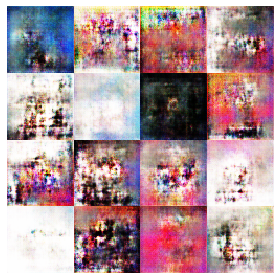

Begin step:  1500


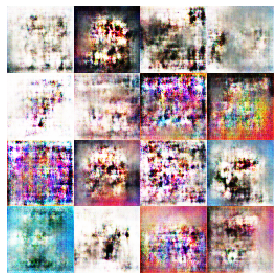

Disc: real loss: 0.439015 fake loss: 0.424505
GAN loss: 2.300107
Step 1500 completed. Time took: 2 secs.
Begin step:  1501
Disc: real loss: 0.415416 fake loss: 0.459481
GAN loss: 2.404032
Step 1501 completed. Time took: 1 secs.
Begin step:  1502
Disc: real loss: 0.371746 fake loss: 0.407089
GAN loss: 2.604766
Step 1502 completed. Time took: 1 secs.
Begin step:  1503
Disc: real loss: 0.419301 fake loss: 0.357554
GAN loss: 2.207607
Step 1503 completed. Time took: 1 secs.
Begin step:  1504
Disc: real loss: 0.381800 fake loss: 0.382271
GAN loss: 2.523365
Step 1504 completed. Time took: 1 secs.
Begin step:  1505
Disc: real loss: 0.460535 fake loss: 0.447768
GAN loss: 2.568427
Step 1505 completed. Time took: 1 secs.
Begin step:  1506
Disc: real loss: 0.399483 fake loss: 0.324409
GAN loss: 2.574083
Step 1506 completed. Time took: 1 secs.
Begin step:  1507
Disc: real loss: 0.424523 fake loss: 0.374282
GAN loss: 1.829210
Step 1507 completed. Time took: 1 secs.
Begin step:  1508
Disc: real loss:

In [ ]:
# Use a fixed noise vector to see how the GAN Images transition through time on a fixed noise. 
fixed_noise = gen_noise(16,noise_shape)

# To keep Track of losses
avg_disc_fake_loss = []
avg_disc_real_loss = []
avg_GAN_loss = []

# We will run for num_steps iterations
for step in range(num_steps): 
    tot_step = step
    print("Begin step: ", tot_step)
    # to keep track of time per step
    step_begin_time = time.time() 
    
    # sample a batch of normalized images from the dataset
    real_data_X = sample_from_dataset(batch_size, image_shape, data_dir=data_dir)
    
    # Genearate noise to send as input to the generator
    noise = gen_noise(batch_size,noise_shape)
    
    # Use generator to create(predict) images
    fake_data_X = generator.predict(noise)
    
    # Save predicted images from the generator every 10th step
    if (tot_step % 100) == 0:
        step_num = str(tot_step).zfill(4)
        save_img_batch(fake_data_X,img_save_dir+step_num+"_image.jpg")
    
    # Create the labels for real and fake data. We don't give exact ones and zeros but add a small amount of noise. This is an important GAN training trick
    real_data_Y = np.ones(batch_size) - np.random.random_sample(batch_size)*0.2
    fake_data_Y = np.random.random_sample(batch_size)*0.2
        
    # train the discriminator using data and labels

    discriminator.trainable = True
    generator.trainable = False

    # Training Discriminator seperately on real data
    dis_metrics_real = discriminator.train_on_batch(real_data_X,real_data_Y) 
    # training Discriminator seperately on fake data
    dis_metrics_fake = discriminator.train_on_batch(fake_data_X,fake_data_Y) 
    
    print("Disc: real loss: %f fake loss: %f" % (dis_metrics_real[0], dis_metrics_fake[0]))
    
    # Save the losses to plot later
    avg_disc_fake_loss.append(dis_metrics_fake[0])
    avg_disc_real_loss.append(dis_metrics_real[0])
    
    # Train the generator using a random vector of noise and its labels (1's with noise)
    generator.trainable = True
    discriminator.trainable = False

    GAN_X = gen_noise(batch_size,noise_shape)
    GAN_Y = real_data_Y
   
    gan_metrics = gan.train_on_batch(GAN_X,GAN_Y)
    print("GAN loss: %f" % (gan_metrics[0]))
    
    # Log results by opening a file in append mode
    text_file = open(log_dir+"\\training_log.txt", "a")
    text_file.write("Step: %d Disc: real loss: %f fake loss: %f GAN loss: %f\n" % (tot_step, dis_metrics_real[0], dis_metrics_fake[0],gan_metrics[0]))
    text_file.close()

    # save GAN loss to plot later
    avg_GAN_loss.append(gan_metrics[0])
            
    end_time = time.time()
    diff_time = int(end_time - step_begin_time)
    print("Step %d completed. Time took: %s secs." % (tot_step, diff_time))
    
    # save model at every 500 steps
    if ((tot_step+1) % 500) == 0:
        print("-----------------------------------------------------------------")
        print("Average Disc_fake loss: %f" % (np.mean(avg_disc_fake_loss))) 
        print("Average Disc_real loss: %f" % (np.mean(avg_disc_real_loss))) 
        print("Average GAN loss: %f" % (np.mean(avg_GAN_loss)))
        print("-----------------------------------------------------------------")
        discriminator.trainable = False
        generator.trainable = False
        # predict on fixed_noise
        fixed_noise_generate = generator.predict(noise)
        step_num = str(tot_step).zfill(4)
        save_img_batch(fixed_noise_generate,img_save_dir+step_num+"fixed_image.png")
        generator.save(save_model_dir+str(tot_step)+"_GENERATOR_weights_and_arch.hdf5")
        discriminator.save(save_model_dir+str(tot_step)+"_DISCRIMINATOR_weights_and_arch.hdf5")

In [ ]:
filedir = r"C:\\Users\brian\Documents\dsc160-final-dsc160-group18\data"
generator = load_model(filedir+ '\\' +'output9999_GENERATOR_weights_and_arch.hdf5')

#generate final sample images
for i in range(10):
    generate_images(generator, filedir)

In [ ]:
import imageio

In [ ]:
output_dir = r"C:\\Users\brian\Documents\dsc160-final-dsc160-group18\data"

In [ ]:
images = []
generated_images = list(glob.glob(output_dir + '*/*.jpg'))
for x in range(0,num_steps,100):
    for filename in generated_images:
        images.append(imageio.imread(filename))
imageio.mimsave(img_save_dir+'movie.gif', images)
from IPython.display import Image
with open(img_save_dir+'movie.gif','rb') as f:
    display(Image(data=f.read(), format='png'))